In [2]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 1e6
N = 10000 # number of samples to simulate

# Create a tone to act as the transmitter signal
t = np.arange(N)/sample_rate # time vector
f_tone = 0.02e6
tx = np.exp(2j * np.pi * f_tone * t)

In [3]:
d = 0.5 # half wavelength spacing
Nr = 3
theta_degrees = 20 # direction of arrival (feel free to change this, it's arbitrary)
theta = theta_degrees / 180 * np.pi # convert to radians
s = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta)) # Steering Vector
print(s) # note that it's 3 elements long, it's complex, and the first element is 1+0j

[ 1.        +0.j          0.47618256-0.87934645j -0.54650034-0.83745888j]


In [4]:
s = s.reshape(-1,1) # make s a column vector
print(s.shape) # 3x1
tx = tx.reshape(1,-1) # make tx a row vector
print(tx.shape) # 1x10000

X = s @ tx # Simulate the received signal X through a matrix multiply
print(X.shape) # 3x10000.  X is now going to be a 2D array, 1D is time and 1D is the spatial dimension

(3, 1)
(1, 10000)
(3, 10000)


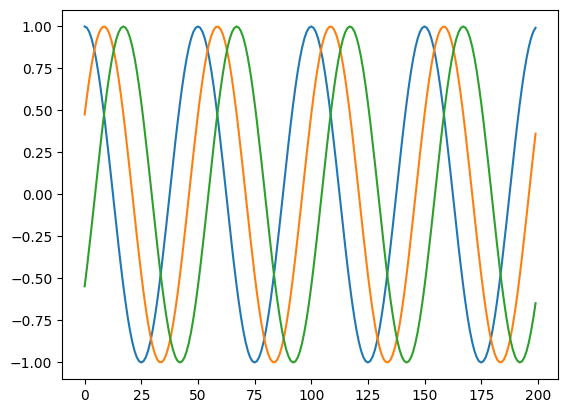

In [5]:
plt.plot(np.asarray(X[0,:]).squeeze().real[0:200]) # the asarray and squeeze are just annoyances we have to do because we came from a matrix
plt.plot(np.asarray(X[1,:]).squeeze().real[0:200])
plt.plot(np.asarray(X[2,:]).squeeze().real[0:200])
plt.show()

In [6]:
n = np.random.randn(Nr, N) + 1j*np.random.randn(Nr, N)
X = X + 0.5*n # X and n are both 3x10000

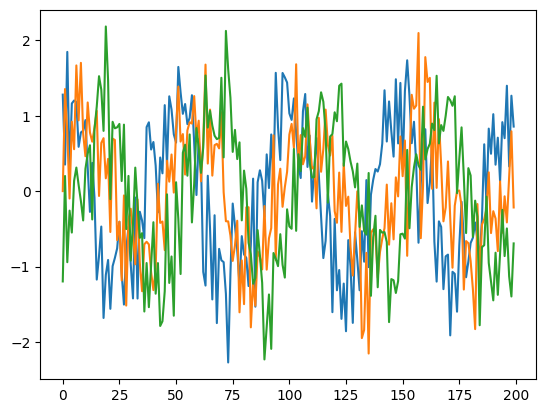

In [7]:
plt.plot(np.asarray(X[0,:]).squeeze().real[0:200]) # the asarray and squeeze are just annoyances we have to do because we came from a matrix
plt.plot(np.asarray(X[1,:]).squeeze().real[0:200])
plt.plot(np.asarray(X[2,:]).squeeze().real[0:200])
plt.show()

# Conventiona beamforming

In [8]:
w = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta)) # Conventional, aka delay-and-sum, beamformer
X_weighted = w.conj().T @ X # example of applying the weights to the received signal (i.e., perform the beamforming)
print(X_weighted.shape) # 1x10000

(10000,)


159.81981981981977


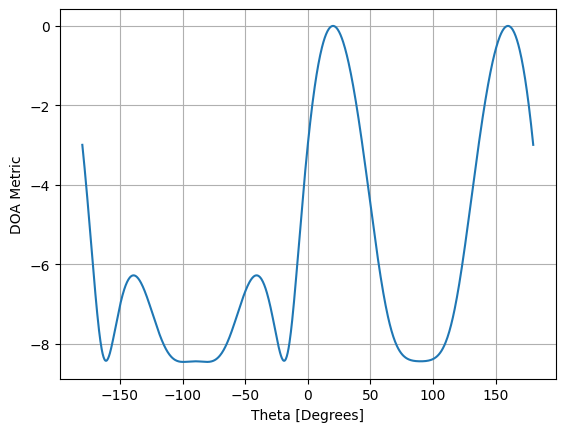

In [9]:
theta_scan = np.linspace(-1*np.pi, np.pi, 1000) # 1000 different thetas between -180 and +180 degrees
results = []
for theta_i in theta_scan:
   w = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta_i)) # Conventional, aka delay-and-sum, beamformer
   X_weighted = w.conj().T @ X # apply our weights. remember X is 3x10000
   results.append(10*np.log10(np.var(X_weighted))) # power in signal, in dB so its easier to see small and large lobes at the same time
results -= np.max(results) # normalize (optional)

# print angle that gave us the max value
print(theta_scan[np.argmax(results)] * 180 / np.pi) # 19.99999999999998

plt.plot(theta_scan*180/np.pi, results) # lets plot angle in degrees
plt.xlabel("Theta [Degrees]")
plt.ylabel("DOA Metric")
plt.grid()
plt.show()

In [10]:
w

array([1.+0.00000000e+00j, 1.-3.84734139e-16j, 1.-7.69468277e-16j])